<h1><center>House Prices - Advanced Regression Techniques</center></h1>
<h3><center>Predict sales prices and practice feature engineering, RFs, and gradient boosting</center></h3>

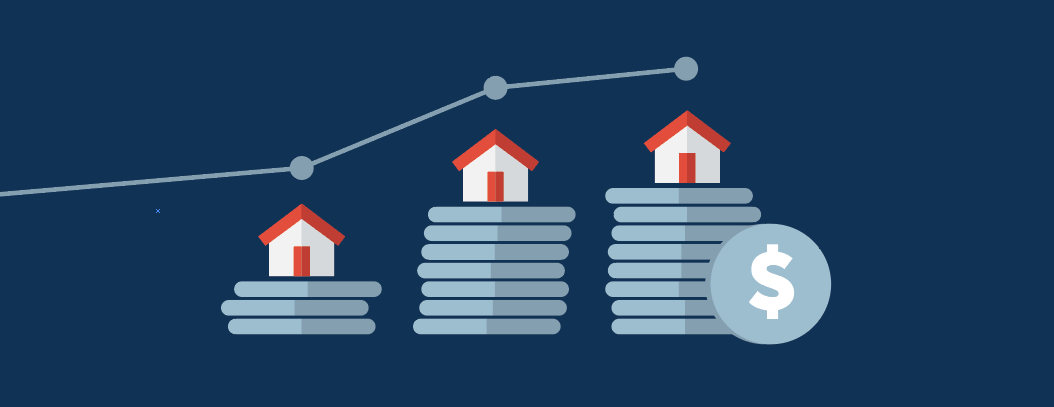

<h3><center>1. Understanding </center></h3>
This competition challenges you to <b>predict the final price</b> of each home, with 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa.

<h3><center> 2. EDA & Data Description </center></h3>

In [ ]:
# Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import matplotlib.gridspec as gridspec
import statsmodels.api as sm
import seaborn as sns
from scipy import stats
from scipy.stats import norm
from scipy.stats import skew
import plotly
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
plotly.offline.init_notebook_mode(connected=True)
from sklearn.neighbors import KNeighborsRegressor

# color palette
custom_colors=["#B69BC5","#BB1C8B","#05A4C0",'#CCEBC5',"#D2A7D8",'#FDDAEC',  "#85CEDA",]
customPalette=sns.set_palette(sns.color_palette(custom_colors))

#set size
sns.palplot(sns.color_palette(custom_colors),size=1)
plt.tick_params(axis='both',labelsize=0,length=0)


In [ ]:
# train data
train_df=pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
train_df.head()

In [ ]:
#test data
test_df=pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')
test_df.head()

In [ ]:
train_df.info()

In [ ]:
# test_df.info()

##### As we can see there are 79 features in the training dataset. Let's have a quick understanding of them.....
<br>

* **SalePrice** - the property's sale price in dollars. This is the target variable that you're trying to predict.

* **MSSubClass**: The building class

* **MSZoning**: The general zoning classification

* **LotFrontage**: Linear feet of street connected to property

* **LotArea**: Lot size in square feet

* **Street**: Type of road access

* **Alley**: Type of alley access

* **LotShape**: General shape of property

* **LandContour**: Flatness of the property

* **Utilities**: Type of utilities available

* **LotConfig**: Lot configuration

* **LandSlope**: Slope of property

* **Neighborhood**: Physical locations within Ames city limits

* **Condition1**: Proximity to main road or railroad

* **Condition2**: Proximity to main road or railroad (if a second is present)

* **BldgType**: Type of dwelling

* **HouseStyle**: Style of dwelling

* **OverallQual**: Overall material and finish quality

* **OverallCond**: Overall condition rating

* **YearBuilt**: Original construction date

* **YearRemodAdd**: Remodel date

* **RoofStyle**: Type of roof

* **RoofMatl**: Roof material

* **Exterior1st**: Exterior covering on house

* **Exterior2nd**: Exterior covering on house (if more than one material)

* **MasVnrType**: Masonry veneer type

* **MasVnrArea**: Masonry veneer area in square feet

* **ExterQual**: Exterior material quality

* **ExterCond**: Present condition of the material on the exterior

* **Foundation**: Type of foundation

* |**BsmtQual**: Height of the basement

* **BsmtCond**: General condition of the basement

* **BsmtExposure**: Walkout or garden level basement walls

* **BsmtFinType1**: Quality of basement finished area

* **BsmtFinSF1**: Type 1 finished square feet

* **BsmtFinType2**: Quality of second finished area (if present)

* **BsmtFinSF2**: Type 2 finished square feet

* **BsmtUnfSF**: Unfinished square feet of basement area

* **TotalBsmtSF**: Total square feet of basement area

* **Heating**: Type of heating

* **HeatingQC**: Heating quality and condition

* **CentralAir**: Central air conditioning

* **Electrical**: Electrical system

* **1stFlrSF**: First Floor square feet

* **2ndFlrSF**: Second floor square feet

* **LowQualFinSF**: Low quality finished square feet (all floors)

* **GrLivArea**: Above grade (ground) living area square feet

* **BsmtFullBath**: Basement full bathrooms

* **BsmtHalfBath**: Basement half bathrooms

* **FullBath**: Full bathrooms above grade

* **HalfBath**: Half baths above grade

* **Bedroom**: Number of bedrooms above basement level

* **Kitchen**: Number of kitchens

* **KitchenQual**: Kitchen quality

* **TotRmsAbvGrd**: Total rooms above grade (does not include bathrooms)

* **Functional**: Home functionality rating

* **Fireplaces**: Number of fireplaces

* **FireplaceQu**: Fireplace quality

* **GarageType**: Garage location

* **GarageYrBlt**: Year garage was built

* **GarageFinish**: Interior finish of the garage

* **GarageCars**: Size of garage in car capacity

* **GarageArea**: Size of garage in square feet

* **GarageQual**: Garage quality

* **GarageCond**: Garage condition

* **PavedDrive**: Paved driveway

* **WoodDeckSF**: Wood deck area in square feet

* **OpenPorchSF**: Open porch area in square feet

* **EnclosedPorch**: Enclosed porch area in square feet

* **3SsnPorch**: Three season porch area in square feet

* **ScreenPorch**: Screen porch area in square feet

* **PoolArea**: Pool area in square feet

* **PoolQC**: Pool quality

* **Fence**: Fence quality

* **MiscFeature**: Miscellaneous feature not covered in other categories

* **MiscVal**: $Value of miscellaneous feature

* **MoSold**: Month Sold

* **YrSold**: Year Sold

* **SaleType**: Type of sale

* **SaleCondition**: Condition of sale

In [ ]:
# Visualize the distribution of target variable
(mu, sigma) = norm.fit(train_df['SalePrice'])
plt.figure(figsize = (12,6))
sns.distplot(train_df['SalePrice'], kde = True, hist=True, fit = norm)
plt.title('SalePrice distribution vs Normal Distribution', fontsize = 13)
plt.xlabel("House's sale Price in $", fontsize = 12)
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.show()

##### From above we can see that data is not normally distributed. Instead it is right skewed. We will handle this issue later in this notebook

In [ ]:
# Correlation matrix - numerical correlation between features
f, ax = plt.subplots(figsize=(30, 25))
mat = train_df.corr('pearson')
mask = np.triu(np.ones_like(mat, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(mat, mask=mask, cmap=cmap, vmax=1, center=0, annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [ ]:
# MasVnrArea vs SalePrice
fig = px.scatter(train_df, x='MasVnrArea' , y='SalePrice')
fig.show()

In [ ]:
#TotRmsAbvGrd vs SalePrice
fig = px.scatter(train_df, x='TotRmsAbvGrd' , y='SalePrice')
fig.show()

In [ ]:
#LotFrontage vs SalePrice
fig = px.scatter(train_df, x="LotFrontage" , y="SalePrice")
fig.show()

In [ ]:
#TotalBsmtSF vs SalePrice
fig = px.scatter(train_df, x="TotalBsmtSF" , y="SalePrice")
fig.show()

In [ ]:
# YearBuilt vs SalePrice
Pearson_YrBlt = 0.56
plt.figure(figsize = (12,6))
sns.regplot(data=train_df, x = 'YearBuilt', y='SalePrice', scatter_kws={'alpha':0.2})
plt.title('YearBuilt vs SalePrice', fontsize = 12)
plt.legend(['$Pearson=$ {:.2f}'.format(Pearson_YrBlt)], loc = 'best')
plt.show()

In [ ]:
#YearRemodAdd vs SalePrice
fig = px.bar(train_df, x="YearRemodAdd", y="SalePrice",
              barmode='group',
             height=600, color_discrete_sequence=px.colors.qualitative.Set1)
fig.show()

In [ ]:
#Sale Price vs 2nd floor in sq feet
N = 2000
train_x = train_df["2ndFlrSF"]
train_y = train_df["SalePrice"]
colors = np.random.rand(2938)
sz = np.random.rand(N)*30

fig = go.Figure()
fig.add_scatter(x = train_x,
                y = train_y,
                mode = 'markers',
                marker = {'size': sz,
                         'color': colors,
                         'opacity': 0.6,
                         'colorscale': 'Portland',
                          
                       })

plotly.offline.iplot(fig)

In [ ]:
#Quality of basement finished area
fig = px.pie(train_df, names = "BsmtFinType1", title = "Quality of basement finished area", color_discrete_sequence=px.colors.qualitative.Set3)
fig.show()

In [ ]:
#Garage location
fig = px.pie(train_df, names = "GarageType", title = "Garage location", color_discrete_sequence=px.colors.qualitative.Set2)
fig.show()

In [ ]:
#Type of sale
fig = px.pie(train_df, names = "SaleType", title = "Type of sale", color_discrete_sequence=px.colors.qualitative.Set1)
fig.show()

In [ ]:
#Condition of sale
fig = px.pie(train_df, names = "SaleCondition", title = "Condition of sale")
fig.show()

In [ ]:
#MSSubClass vs SalePrice
fig =px.bar(train_df,x='ExterQual', y='SalePrice',barmode='group',
             height=600)
fig.show()

In [ ]:
#MSZoning vs SalePrice
fig =px.bar(train_df,x='MSZoning', y='SalePrice',barmode='group',
             height=800, color_discrete_sequence=["fuchsia"])

fig.show()

In [ ]:
#Scatterplot matrices
fig = px.scatter_matrix(train_df, dimensions=['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF'])
fig.show()

In [ ]:
#Histogram for each numerical attribute
train_df.hist(bins=50, figsize=(20,15), color='orchid')
plt.show()

<h3><center>Data Preparation</center></h3>
In Data Processing we have to take care of three things-
<ol>
    <li>Missing Values</li>
    <li>Dealing with categorical features</li>
    <li>Data Normalization</li>
</ol>

In [ ]:
# Data preparation
target = train_df['SalePrice']
test_id = test_df['Id']
test_df = test_df.drop(['Id'],axis = 1)
train_df = train_df.drop(['SalePrice','Id'], axis = 1)


# Concatenating train & test set

train_test = pd.concat([train_df,test_df], axis=0, sort=False)

In [ ]:
# Looking at NaN % within the data
# if NaN % in under 20% keep it else discard it
nan = pd.DataFrame(train_test.isna().sum(), columns = ['Total Missng Values'])
nan['Feature'] = nan.index
nan['Perc(%)'] = (nan['Total Missng Values']/1460)*100
nan = nan[nan['Total Missng Values'] > 0]
nan = nan.sort_values(by = ['Total Missng Values'])
nan['Usability'] = np.where(nan['Perc(%)'] > 20, 'Discard', 'Keep')
nan

In [ ]:
# Plotting Nan

plt.figure(figsize = (15,5))
sns.barplot(x = nan['Feature'], y = nan['Perc(%)'])
plt.xticks(rotation=45)
plt.title('Features containing Nan')
plt.xlabel('Features')
plt.ylabel('% of Missing Data')
plt.show()

In [ ]:
# Converting non-numeric predictors stored as numbers into string

train_test['MSSubClass'] = train_test['MSSubClass'].apply(str)
train_test['YrSold'] = train_test['YrSold'].apply(str)
train_test['MoSold'] = train_test['MoSold'].apply(str)


In [ ]:
# Data Imputation
train_test['Functional'] = train_test['Functional'].fillna('Typ')
train_test['Electrical'] = train_test['Electrical'].fillna("SBrkr")
train_test['KitchenQual'] = train_test['KitchenQual'].fillna("TA")
train_test['Exterior1st'] = train_test['Exterior1st'].fillna(train_test['Exterior1st'].mode()[0])
train_test['Exterior2nd'] = train_test['Exterior2nd'].fillna(train_test['Exterior2nd'].mode()[0])
train_test['SaleType'] = train_test['SaleType'].fillna(train_test['SaleType'].mode()[0])
train_test["PoolQC"] = train_test["PoolQC"].fillna("None")
train_test["Alley"] = train_test["Alley"].fillna("None")
train_test['FireplaceQu'] = train_test['FireplaceQu'].fillna("None")
train_test['Fence'] = train_test['Fence'].fillna("None")
train_test['MiscFeature'] = train_test['MiscFeature'].fillna("None")

for col in ('GarageArea', 'GarageCars'):
    train_test[col] = train_test[col].fillna(0)
        
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    train_test[col] = train_test[col].fillna('None')
    
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    train_test[col] = train_test[col].fillna('None')
    
    # Checking the features with NaN remained out

for col in train_test:
    if train_test[col].isna().sum() > 0:
        print(train_test[col][0])

In [ ]:
# Removing the useless variables
useless = ['GarageYrBlt','YearRemodAdd'] 
train_test = train_test.drop(useless, axis = 1)

In [ ]:
# Imputing with KnnRegressor 
def impute_knn(df):
    ttn = train_test.select_dtypes(include=[np.number])
    ttc = train_test.select_dtypes(exclude=[np.number])
    cols_nan = ttn.columns[ttn.isna().any()].tolist()         # columns w/ nan 
    cols_no_nan = ttn.columns.difference(cols_nan).values     # columns w/n nan
    for col in cols_nan:
        imp_test = ttn[ttn[col].isna()]   # indicies which have missing data will become our test set
        imp_train = ttn.dropna()          # all indicies which which have no missing data 
        model = KNeighborsRegressor(n_neighbors=5)  # KNR Unsupervised Approach
        knr = model.fit(imp_train[cols_no_nan], imp_train[col])
        ttn.loc[ttn[col].isna(), col] = knr.predict(imp_test[cols_no_nan])  
    return pd.concat([ttn,ttc],axis=1)
train_test = impute_knn(train_test)
objects = []
for i in train_test.columns:
    if train_test[i].dtype == object:
        objects.append(i)
train_test.update(train_test[objects].fillna('None'))
## Checking NaN presence
for col in train_test:
    if train_test[col].isna().sum() > 0:
        print(train_test[col][0])

<h3><center>Feature Engineering</center></h3>


In [ ]:
#Let's create some new features combining the ones that we already have. 
#These could help us to increase the performance of the model!

train_test["SqFtPerRoom"] = train_test["GrLivArea"] / (train_test["TotRmsAbvGrd"] +
                                                       train_test["FullBath"] +
                                                       train_test["HalfBath"] +
                                                       train_test["KitchenAbvGr"])

train_test['Total_Home_Quality'] = train_test['OverallQual'] + train_test['OverallCond']

train_test['Total_Bathrooms'] = (train_test['FullBath'] + (0.5 * train_test['HalfBath']) +
                               train_test['BsmtFullBath'] + (0.5 * train_test['BsmtHalfBath']))

train_test["HighQualSF"] = train_test["1stFlrSF"] + train_test["2ndFlrSF"]

In [ ]:
# Converting non-numeric predictors stored as numbers into string

train_test['MSSubClass'] = train_test['MSSubClass'].apply(str)
train_test['YrSold'] = train_test['YrSold'].apply(str)
train_test['MoSold'] = train_test['MoSold'].apply(str)

In [ ]:
# Creating dummy variables from categorical features

train_test_dummy = pd.get_dummies(train_test)

In [ ]:
# Fetch all numeric features

numeric_features = train_test_dummy.dtypes[train_test_dummy.dtypes != object].index
skewed_features = train_test_dummy[numeric_features].apply(lambda x: skew(x)).sort_values(ascending=False)
high_skew = skewed_features[skewed_features > 0.5]
skew_index = high_skew.index

In [ ]:
# Normalize skewed features using log_transformation
for i in skew_index:
    train_test_dummy[i] = np.log1p(train_test_dummy[i])

##### Finally transform target column ('Saleprice') distribution

In [ ]:
# SalePrice before transformation

fig, ax = plt.subplots(1,2, figsize= (15,5))
fig.suptitle(" qq-plot & distribution SalePrice ", fontsize= 15)

sm.qqplot(target, stats.t, distargs=(4,),fit=True, line="45", ax = ax[0])

sns.distplot(target, kde = True, hist=True, fit = norm, ax = ax[1])
plt.show()


In [ ]:
# SalePrice after transformation
target_log = np.log1p(target)
fig, ax = plt.subplots(1,2, figsize= (15,5))
fig.suptitle("qq-plot & distribution SalePrice ", fontsize= 15)
sm.qqplot(target_log, stats.t, distargs=(4,),fit=True, line="45", ax = ax[0])
sns.distplot(target_log, kde = True, hist=True, fit = norm, ax = ax[1])
plt.show()

Finally...
<h3><center>Modeling</center></h3>

In [ ]:
import shap
import xgboost as xgb
from catboost import Pool
from sklearn.svm import SVR
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor
from mlxtend.regressor import StackingRegressor
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error


In [ ]:
# Train-Test separation

train = train_test_dummy[0:1460]
test = train_test_dummy[1460:]
test['Id'] = test_id

# Creation of the RMSE metric:
    
def rmse(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

def cv_rmse(model):
    rmse = np.sqrt(-cross_val_score(model, train, target_log, scoring="neg_mean_squared_error", cv=kf))
    return (rmse)

In [ ]:
# 10 Fold Cross validation

kf = KFold(n_splits=10, random_state=42, shuffle=True)

cv_scores = []
cv_std = []

baseline_models = ['Linear_Reg.','Bayesian_Ridge_Reg.','LGBM_Reg.','SVR',
                   'Dec_Tree_Reg.','Random_Forest_Reg.', 'XGB_Reg.',
                   'Grad_Boost_Reg.','Cat_Boost_Reg.','Stacked_Reg.']

# Linear Regression

lreg = LinearRegression()
score_lreg = cv_rmse(lreg)
cv_scores.append(score_lreg.mean())
cv_std.append(score_lreg.std())

# Bayesian Ridge Regression

brr = BayesianRidge(compute_score=True)
score_brr = cv_rmse(brr)
cv_scores.append(score_brr.mean())
cv_std.append(score_brr.std())

# Light Gradient Boost Regressor

l_gbm = LGBMRegressor(objective='regression')
score_l_gbm = cv_rmse(l_gbm)
cv_scores.append(score_l_gbm.mean())
cv_std.append(score_l_gbm.std())

# Support Vector Regression

svr = SVR()
score_svr = cv_rmse(svr)
cv_scores.append(score_svr.mean())
cv_std.append(score_svr.std())

# Decision Tree Regressor

dtr = DecisionTreeRegressor()
score_dtr = cv_rmse(dtr)
cv_scores.append(score_dtr.mean())
cv_std.append(score_dtr.std())

# Random Forest Regressor

rfr = RandomForestRegressor()
score_rfr = cv_rmse(rfr)
cv_scores.append(score_rfr.mean())
cv_std.append(score_rfr.std())

# XGB Regressor

xgb = xgb.XGBRegressor()
score_xgb = cv_rmse(xgb)
cv_scores.append(score_xgb.mean())
cv_std.append(score_xgb.std())

# Gradient Boost Regressor

gbr = GradientBoostingRegressor()
score_gbr = cv_rmse(gbr)
cv_scores.append(score_gbr.mean())
cv_std.append(score_gbr.std())

# Cat Boost Regressor

catb = CatBoostRegressor()
score_catb = cv_rmse(catb)
cv_scores.append(score_catb.mean())
cv_std.append(score_catb.std())

# Stacked Regressor

stack_gen = StackingRegressor(regressors=(CatBoostRegressor(),
                                          LinearRegression(),
                                          BayesianRidge(),
                                          GradientBoostingRegressor()),
                              meta_regressor = CatBoostRegressor(),
                              use_features_in_secondary = True)

score_stack_gen = cv_rmse(stack_gen)
cv_scores.append(score_stack_gen.mean())
cv_std.append(score_stack_gen.std())

final_cv_score = pd.DataFrame(baseline_models, columns = ['Regressors'])
final_cv_score['RMSE_mean'] = cv_scores
final_cv_score['RMSE_std'] = cv_std

In [ ]:
final_cv_score

In [ ]:
plt.figure(figsize = (12,8))
sns.barplot(final_cv_score['Regressors'],final_cv_score['RMSE_mean'])
plt.xlabel('Regressors', fontsize = 12)
plt.ylabel('CV_Mean_RMSE', fontsize = 12)
plt.xticks(rotation=45)
plt.show()

In [ ]:
X_train,X_val,y_train,y_val = train_test_split(train,target_log,test_size = 0.1,random_state=42)

# Cat Boost Regressor

cat = CatBoostRegressor()
cat_model = cat.fit(X_train,y_train,
                     eval_set = (X_val,y_val),
                     plot=True,
                     verbose = 0)

In [ ]:
cat_pred = cat_model.predict(X_val)
cat_score = rmse(y_val, cat_pred)
cat_score

In [ ]:
# Features' importance of our model

feat_imp = cat_model.get_feature_importance(prettified=True)
feat_imp

In [ ]:
# Plotting top 20 features' importance

plt.figure(figsize = (12,8))
sns.barplot(feat_imp['Importances'][:20],feat_imp['Feature Id'][:20], orient = 'h')
plt.show()

In [ ]:
# Preforming a Random Grid Search to find the best combination of parameters

grid = {'iterations': [1000,6000],
        'learning_rate': [0.05, 0.005, 0.0005],
        'depth': [4, 6, 10],
        'l2_leaf_reg': [1, 3, 5, 9]}

final_model = CatBoostRegressor()
randomized_search_result = final_model.randomized_search(grid,
                                                   X = X_train,
                                                   y= y_train,
                                                   verbose = False,
                                                   plot=True)
                                                   

In [ ]:
# Final Cat-Boost Regressor

params = {'iterations': 6000,
          'learning_rate': 0.005,
          'depth': 4,
          'l2_leaf_reg': 1,
          'eval_metric':'RMSE',
          'early_stopping_rounds': 200,
          'verbose': 200,
          'random_seed': 42}
         
cat_f = CatBoostRegressor(**params)
cat_model_f = cat_f.fit(X_train,y_train,
                     eval_set = (X_val,y_val),
                     plot=True,
                     verbose = False)

catf_pred = cat_model_f.predict(X_val)
catf_score = rmse(y_val, catf_pred)

In [ ]:
catf_score

In [ ]:
# Test CSV Submission

test_pred = cat_f.predict(test)
submission = pd.DataFrame(test_id, columns = ['Id'])
test_pred = np.expm1(test_pred)
submission['SalePrice'] = test_pred 
submission.head()

In [ ]:
# Saving the results in a csv file

submission.to_csv("result.csv", index = False, header = True)